## **Introduction**

#### This study focused on developing a machine learning model to classify electrocardiogram (ECG) signals into normal and abnormal rhythms, specifically targeting arrhythmia detection. Initial attempts using raw ECG signals with Recurrent Neural Networks (RNN) and Long Short-Term Memory (LSTM) networks resulted in suboptimal performance. To enhance the model's accuracy, we implemented a feature extraction process to derive informative time-frequency features from the ECG signals before training the LSTM model.

### **Dataset Overview**

Your dataset `ECGData.mat` contains:

- **Signals**: A 162x65536 matrix where each row represents an ECG signal of length 65,536 samples.
- **Labels**: A 162x1 cell array containing labels for each signal.
- **Labels Meaning**:
    - `'ARR'`: Arrhythmia (from MIT-BIH Arrhythmia Database)
    - `'CHF'`: Congestive Heart Failure (from BIDMC Congestive Heart Failure Database)
    - `'NSR'`: Normal Sinus Rhythm (from MIT-BIH Normal Sinus Rhythm Database)
- **Sampling Rate**: All signals have been resampled to **128 Hz**.
- **Signal Length**: Each signal is **65536 samples long**, corresponding to approximately 8.5 minutes of data (since 65536 samples / 128 Hz ≈ 512 seconds).

In [1]:
# Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat


In [2]:
# Load 'ECGData.mat'
data = loadmat('ECGData.mat')

# Access 'ECGData'
ecg_data = data['ECGData']


In [3]:
print(ecg_data.dtype)
ecg_data_item = ecg_data[0, 0]

[('Data', 'O'), ('Labels', 'O')]


In [4]:
# Extract 'Data' and 'Labels' from 'ecg_data_item'
Signals = ecg_data_item['Data']
Labels_array = ecg_data_item['Labels']


print(labels_array)

In [5]:
print(Labels_array)


[[array(['ARR'], dtype='<U3')]
 [array(['ARR'], dtype='<U3')]
 [array(['ARR'], dtype='<U3')]
 [array(['ARR'], dtype='<U3')]
 [array(['ARR'], dtype='<U3')]
 [array(['ARR'], dtype='<U3')]
 [array(['ARR'], dtype='<U3')]
 [array(['ARR'], dtype='<U3')]
 [array(['ARR'], dtype='<U3')]
 [array(['ARR'], dtype='<U3')]
 [array(['ARR'], dtype='<U3')]
 [array(['ARR'], dtype='<U3')]
 [array(['ARR'], dtype='<U3')]
 [array(['ARR'], dtype='<U3')]
 [array(['ARR'], dtype='<U3')]
 [array(['ARR'], dtype='<U3')]
 [array(['ARR'], dtype='<U3')]
 [array(['ARR'], dtype='<U3')]
 [array(['ARR'], dtype='<U3')]
 [array(['ARR'], dtype='<U3')]
 [array(['ARR'], dtype='<U3')]
 [array(['ARR'], dtype='<U3')]
 [array(['ARR'], dtype='<U3')]
 [array(['ARR'], dtype='<U3')]
 [array(['ARR'], dtype='<U3')]
 [array(['ARR'], dtype='<U3')]
 [array(['ARR'], dtype='<U3')]
 [array(['ARR'], dtype='<U3')]
 [array(['ARR'], dtype='<U3')]
 [array(['ARR'], dtype='<U3')]
 [array(['ARR'], dtype='<U3')]
 [array(['ARR'], dtype='<U3')]
 [array(

In [6]:
# Initialize an empty list to store labels
Labels = []

# Iterate over each label and extract the string
for i in range(Labels_array.shape[0]):
    label = Labels_array[i, 0][0]
    Labels.append(label)


In [7]:
# first few labels
print("First five labels:", Labels[:5])

# number of signals and labels
print("Number of signals:", Signals.shape[0])
print("Number of labels:", len(Labels))


First five labels: [np.str_('ARR'), np.str_('ARR'), np.str_('ARR'), np.str_('ARR'), np.str_('ARR')]
Number of signals: 162
Number of labels: 162


In [8]:
# Map labels
Labels_mapped = []
for label in Labels:
    if label == 'NSR':
        Labels_mapped.append('N')
    elif label in ['ARR', 'CHF']:
        Labels_mapped.append('A')
    else:
        Labels_mapped.append('Other')




In [9]:
Labels_mapped = np.array(Labels_mapped)

In [10]:
labels_df = pd.Series(Labels_mapped)
label_counts = labels_df.value_counts()
print("Mapped Labels:")
print(label_counts)


Mapped Labels:
A    126
N     36
Name: count, dtype: int64


In [11]:
# Normalize signals
Signals_normalized = []
for signal in Signals:
    signal = signal.astype(np.float32) 
    signal = (signal - np.mean(signal)) / np.std(signal)
    Signals_normalized.append(signal)


In [12]:
Signals_normalized = np.array(Signals_normalized)


In [13]:
print("Shape of normalized signals:", Signals_normalized.shape)


Shape of normalized signals: (162, 65536)


**Convert labels to numerical values:**

'N' → 0 (Normal)
'A' → 1 (Abnormal)

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
segment_labels_encoded = le.fit_transform(Labels_mapped)


In [15]:
print(segment_labels_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [16]:
print(Signals_normalized)

[[ 1.2192862   0.8885181   0.99535817 ...  1.3479102   1.11466
   0.75660217]
 [ 0.8215237   0.9792352   0.9376337  ...  0.32066843  0.25888237
   0.2992487 ]
 [ 0.5345633   0.4877576   0.4890068  ... -0.11291733  0.11217021
   0.14274709]
 ...
 [-0.5551707  -0.5551707  -0.5372338  ... -0.51929694 -0.48342308
  -0.48342308]
 [-0.48556757 -0.42192563 -0.5067815  ... -0.33706972 -0.20978583
  -0.2522138 ]
 [ 0.6698259   0.20187877  0.27986997 ... -0.6950198  -0.8899978
  -0.61702865]]


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    Signals_normalized, segment_labels_encoded, test_size=0.2, random_state=42, stratify=segment_labels_encoded)


**RNN and LSTM models (samples, timesteps, features)**



**samples:** Number of segments, 
**timesteps:** Segment length, 
**features:** 1 (since each time step has one value)

In [18]:
# Reshape input to [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
from tensorflow.keras.optimizers import Adam


### RNN Model Creation and Training

In [20]:
# RNN Model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, input_shape=(65536, 1), activation='tanh'))
rnn_model.add(Dense(1, activation='sigmoid'))

rnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


/Users/macbookpro2017/project research/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
# Train the RNN model
rnn_history = rnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.5058 - loss: 0.7119 - val_accuracy: 0.7273 - val_loss: 0.6902
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5759 - loss: 0.6747 - val_accuracy: 0.4242 - val_loss: 0.6917
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5817 - loss: 0.6674 - val_accuracy: 0.4545 - val_loss: 0.6860
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6265 - loss: 0.6466 - val_accuracy: 0.6061 - val_loss: 0.6662
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.6945 - loss: 0.6259 - val_accuracy: 0.6364 - val_loss: 0.6441
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.6906 - loss: 0.6187 - val_accuracy: 0.7273 - val_loss: 0.6221
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.7296 - loss: 0.5963 - val_accuracy: 0.7879 - val_loss: 0.6029
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.7237 - loss: 0.5805 - val_accuracy: 0.7576 - val_loss: 0.5726
Epoch 9/10
3/3 

### LSTM Model Creation and Training

In [22]:
# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(65536, 1), activation='tanh'))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [23]:
# Train the LSTM model
lstm_history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 36s 10s/step - accuracy: 0.5018 - loss: 0.6928 - val_accuracy: 0.6667 - val_loss: 0.6814
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 37s 11s/step - accuracy: 0.7024 - loss: 0.6742 - val_accuracy: 0.7273 - val_loss: 0.6683
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 38s 12s/step - accuracy: 0.7685 - loss: 0.6608 - val_accuracy: 0.7879 - val_loss: 0.6547
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 38s 12s/step - accuracy: 0.7489 - loss: 0.6491 - val_accuracy: 0.7879 - val_loss: 0.6397
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 38s 11s/step - accuracy: 0.7802 - loss: 0.6283 - val_accuracy: 0.7879 - val_loss: 0.6204
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 35s 10s/step - accuracy: 0.7724 - loss: 0.6098 - val_accuracy: 0.7879 - val_loss: 0.5945
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 37s 12s/step - accuracy: 0.7724 - loss: 0.5883 - val_accuracy: 0.7879 - val_loss: 0.5593
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 39s 11s/step - accuracy: 0.7821 - loss: 0.5502 - val_accuracy: 0.7879 - val_loss: 0.5295


In [24]:
# GRU Model
gru_model = Sequential()
gru_model.add(GRU(64, input_shape=(65536, 1), activation='tanh'))
gru_model.add(Dense(1, activation='sigmoid'))
gru_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
# Train GRU model
gru_history = gru_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 35s 10s/step - accuracy: 0.4941 - loss: 0.6958 - val_accuracy: 0.7879 - val_loss: 0.6794
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 35s 10s/step - accuracy: 0.7880 - loss: 0.6742 - val_accuracy: 0.6970 - val_loss: 0.6646
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 32s 10s/step - accuracy: 0.6478 - loss: 0.6610 - val_accuracy: 0.6364 - val_loss: 0.6542
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 33s 10s/step - accuracy: 0.6478 - loss: 0.6506 - val_accuracy: 0.6667 - val_loss: 0.6426
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 33s 10s/step - accuracy: 0.6381 - loss: 0.6367 - val_accuracy: 0.6667 - val_loss: 0.6304
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 35s 10s/step - accuracy: 0.6479 - loss: 0.6265 - val_accuracy: 0.6364 - val_loss: 0.6181
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 33s 9s/step - accuracy: 0.6342 - loss: 0.6172 - val_accuracy: 0.6970 - val_loss: 0.6058
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 32s 10s/step - accuracy: 0.6361 - loss: 0.6029 - val_accuracy: 0.7576 - val_loss: 0.5930
E

### Accuracy and evaluation of Models

In [26]:

rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test, y_test)
print(f'RNN Test Accuracy: {rnn_accuracy:.4f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 340ms/step - accuracy: 0.7857 - loss: 0.5385
RNN Test Accuracy: 0.7879


In [27]:

lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test)
print(f'LSTM Test Accuracy: {lstm_accuracy:.4f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 537ms/step - accuracy: 0.7857 - loss: 0.5044
LSTM Test Accuracy: 0.7879


In [28]:
gru_loss, gru_accuracy = gru_model.evaluate(X_test, y_test)
print(f'GRU Test Accuracy: {gru_accuracy:.4f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 701ms/step - accuracy: 0.7857 - loss: 0.5670
GRU Test Accuracy: 0.7879


### Performance

In [29]:
performance_df = pd.DataFrame({
    'Model': ['RNN', 'LSTM'],
    'Test Accuracy': [rnn_accuracy, lstm_accuracy]
})

print(performance_df)


  Model  Test Accuracy
0   RNN       0.787879
1  LSTM       0.787879


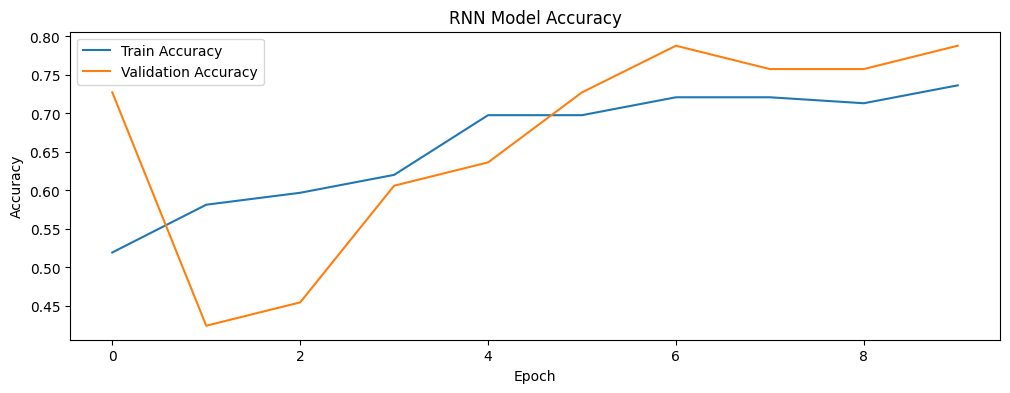

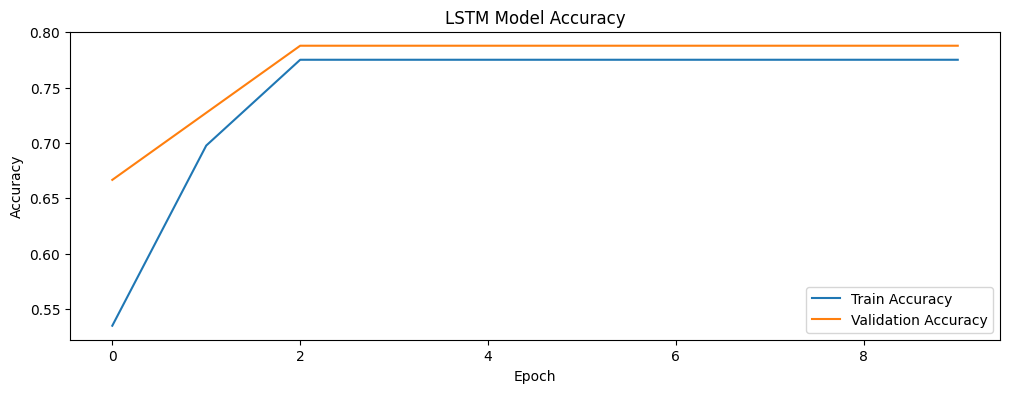

In [30]:
plt.figure(figsize=(12, 4))
plt.plot(rnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Noise Experiment Setup

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.optimizers import Adam

# Load 'ECGData.mat'
data = loadmat('ECGData.mat')
ecg_data = data['ECGData']
ecg_data_item = ecg_data[0, 0]

# Extract 'Data' and 'Labels'
Signals = ecg_data_item['Data']
Labels_array = ecg_data_item['Labels']

Labels = [Labels_array[i,0][0] for i in range(Labels_array.shape[0])]

# Map labels
Labels_mapped = []
for label in Labels:
    if label == 'NSR':
        Labels_mapped.append('N')
    elif label in ['ARR', 'CHF']:
        Labels_mapped.append('A')
    else:
        Labels_mapped.append('Other')

Labels_mapped = np.array(Labels_mapped)

# Normalize signals
Signals_normalized = []
for signal in Signals:
    signal = signal.astype(np.float32) 
    signal = (signal - np.mean(signal)) / np.std(signal)
    Signals_normalized.append(signal)
Signals_normalized = np.array(Signals_normalized)

# Encode labels
le = LabelEncoder()
segment_labels_encoded = le.fit_transform(Labels_mapped)

## Test Without Noise

In [32]:
# For demonstration, let's proceed with normal noise. 
Signals_final = Signals_normalized  # Change to Signals_noisy_uniform or Signals_noisy_exponential to test others

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    Signals_final, segment_labels_encoded, test_size=0.2, random_state=42, stratify=segment_labels_encoded)

# Reshape for RNN/LSTM: [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

### RNN Model ###
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, input_shape=(65536, 1), activation='tanh'))
rnn_model.add(Dense(1, activation='sigmoid'))

rnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
rnn_history = rnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

### LSTM Model ###
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(65536, 1), activation='tanh'))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
lstm_history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test, y_test)
print(f'RNN Test Accuracy without Noise: {rnn_accuracy:.4f}')

lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test)
print(f'LSTM Test Accuracy without Noise: {lstm_accuracy:.4f}')


Epoch 1/10


/Users/macbookpro2017/project research/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.5331 - loss: 0.7138 - val_accuracy: 0.6970 - val_loss: 0.6916
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.6400 - loss: 0.6588 - val_accuracy: 0.7879 - val_loss: 0.6559
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6985 - loss: 0.6231 - val_accuracy: 0.7273 - val_loss: 0.6303
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6459 - loss: 0.6213 - val_accuracy: 0.6970 - val_loss: 0.6423
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6381 - loss: 0.6250 - val_accuracy: 0.6667 - val_loss: 0.6402
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6654 - loss: 0.6071 - val_accuracy: 0.6970 - val_loss: 0.6364
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.6927 - loss: 0.6038 - val_accuracy: 0.6970 - val_loss: 0.6291
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6654 - loss: 0.5935 - val_accuracy: 0.7273 - val_loss: 0.6190
Epoch 9/10
3/3 ━━━━━━━━━━━━

### Noise Functions Definition

In [33]:
def add_normal_noise(signals, noise_factor=0.1):
    # noise_factor: fraction of the standard deviation of the signal
    noisy_signals = []
    for sig in signals:
        sigma = np.std(sig)
        noise = np.random.normal(0, sigma * noise_factor, sig.shape)
        noisy_signals.append(sig + noise)
    return np.array(noisy_signals)

def add_uniform_noise(signals, noise_factor=0.1):
    # noise_factor: fraction of the standard deviation of the signal
    noisy_signals = []
    for sig in signals:
        sigma = np.std(sig)
        # Range of uniform noise: [-sigma*noise_factor, sigma*noise_factor]
        noise = np.random.uniform(-sigma * noise_factor, sigma * noise_factor, sig.shape)
        noisy_signals.append(sig + noise)
    return np.array(noisy_signals)

def add_exponential_noise(signals, noise_factor=0.1):
    # For exponential noise, we take an exponential distribution and adjust by noise_factor
    noisy_signals = []
    for sig in signals:
        sigma = np.std(sig)
        # scale for exponential distribution can be sigma * noise_factor
        noise = np.random.exponential(sigma * noise_factor, sig.shape)
        # Exponential is always positive; we can center it by subtracting its mean to make it more symmetric
        noise = noise - np.mean(noise)
        noisy_signals.append(sig + noise)
    return np.array(noisy_signals)

## Noise Normal

In [34]:
Signals_noisy_normal = add_normal_noise(Signals_normalized, noise_factor=0.05)

# For demonstration, let's proceed with normal noise. 
Signals_final = Signals_noisy_normal  # Change to Signals_noisy_uniform or Signals_noisy_exponential to test others

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    Signals_final, segment_labels_encoded, test_size=0.2, random_state=42, stratify=segment_labels_encoded)

# Reshape for RNN/LSTM: [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

### RNN Model ###
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, input_shape=(65536, 1), activation='tanh'))
rnn_model.add(Dense(1, activation='sigmoid'))

rnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
rnn_history = rnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

### LSTM Model ###
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(65536, 1), activation='tanh'))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
lstm_history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test, y_test)
print(f'RNN Test Accuracy with Noise: {rnn_accuracy:.4f}')

lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test)
print(f'LSTM Test Accuracy with Noise: {lstm_accuracy:.4f}')


Epoch 1/10


/Users/macbookpro2017/project research/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.6226 - loss: 0.6808 - val_accuracy: 0.5152 - val_loss: 0.6752
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.6129 - loss: 0.6625 - val_accuracy: 0.5455 - val_loss: 0.6673
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.5992 - loss: 0.6619 - val_accuracy: 0.4848 - val_loss: 0.6876
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.6303 - loss: 0.6525 - val_accuracy: 0.4848 - val_loss: 0.6806
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.5797 - loss: 0.6537 - val_accuracy: 0.5152 - val_loss: 0.6608
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6479 - loss: 0.6320 - val_accuracy: 0.6364 - val_loss: 0.6421
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6771 - loss: 0.6229 - val_accuracy: 0.6364 - val_loss: 0.6306
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.6673 - loss: 0.6182 - val_accuracy: 0.6667 - val_loss: 0.6229
Epoch 9/10
3/3 ━━━━━━━━━━━━

## Noise Uniform

In [35]:
Signals_noisy_uniform = add_uniform_noise(Signals_normalized, noise_factor=0.05)

# For demonstration, let's proceed with normal noise. 
Signals_final = Signals_noisy_uniform  # Change to Signals_noisy_uniform or Signals_noisy_exponential to test others

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    Signals_final, segment_labels_encoded, test_size=0.2, random_state=42, stratify=segment_labels_encoded)

# Reshape for RNN/LSTM: [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

### RNN Model ###
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, input_shape=(65536, 1), activation='tanh'))
rnn_model.add(Dense(1, activation='sigmoid'))

rnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
rnn_history = rnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

### LSTM Model ###
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(65536, 1), activation='tanh'))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
lstm_history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test, y_test)
print(f'RNN Test Accuracy with Noise: {rnn_accuracy:.4f}')

lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test)
print(f'LSTM Test Accuracy with Noise: {lstm_accuracy:.4f}')

Epoch 1/10


/Users/macbookpro2017/project research/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5000 - loss: 0.6906 - val_accuracy: 0.5758 - val_loss: 0.6531
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6693 - loss: 0.6442 - val_accuracy: 0.7273 - val_loss: 0.6120
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.7159 - loss: 0.6143 - val_accuracy: 0.7576 - val_loss: 0.5499
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.7432 - loss: 0.5633 - val_accuracy: 0.7273 - val_loss: 0.5449
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.7471 - loss: 0.5551 - val_accuracy: 0.6970 - val_loss: 0.5647
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.7412 - loss: 0.5648 - val_accuracy: 0.7576 - val_loss: 0.5404
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.7276 - loss: 0.5829 - val_accuracy: 0.7576 - val_loss: 0.5410
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.7315 - loss: 0.5847 - val_accuracy: 0.7576 - val_loss: 0.5296
Epoch 9/10
3/3 ━━━━━━━━━━━━

## Noise Exponential

In [36]:
Signals_noisy_exponential = add_exponential_noise(Signals_normalized, noise_factor=0.05)

# For demonstration, let's proceed with normal noise. 
Signals_final = Signals_noisy_exponential  # Change to Signals_noisy_uniform or Signals_noisy_exponential to test others

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    Signals_final, segment_labels_encoded, test_size=0.2, random_state=42, stratify=segment_labels_encoded)

# Reshape for RNN/LSTM: [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

### RNN Model ###
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, input_shape=(65536, 1), activation='tanh'))
rnn_model.add(Dense(1, activation='sigmoid'))

rnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
rnn_history = rnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

### LSTM Model ###
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(65536, 1), activation='tanh'))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
lstm_history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test, y_test)
print(f'RNN Test Accuracy with Noise: {rnn_accuracy:.4f}')

lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test)
print(f'LSTM Test Accuracy with Noise: {lstm_accuracy:.4f}')

Epoch 1/10


/Users/macbookpro2017/project research/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.4922 - loss: 0.7184 - val_accuracy: 0.4848 - val_loss: 0.7043
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5506 - loss: 0.6861 - val_accuracy: 0.6364 - val_loss: 0.6728
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6381 - loss: 0.6639 - val_accuracy: 0.6061 - val_loss: 0.6316
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5991 - loss: 0.6398 - val_accuracy: 0.6061 - val_loss: 0.6301
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5836 - loss: 0.6520 - val_accuracy: 0.6667 - val_loss: 0.6053
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.6770 - loss: 0.6073 - val_accuracy: 0.7879 - val_loss: 0.5568
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.7179 - loss: 0.5822 - val_accuracy: 0.7576 - val_loss: 0.5628
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.7412 - loss: 0.5750 - val_accuracy: 0.7576 - val_loss: 0.5673
Epoch 9/10
3/3 ━━━━━━━━━━━━

## Feature Extraction for LSTM Model

In [37]:
# testing with segmentation!!!!!

segment_length = 2048
segments = []
segment_labels = []

for i in range(len(Signals_normalized)):
    signal = Signals_normalized[i]
    label = Labels_mapped[i]
    # Calculate the number of segments
    num_segments = signal.shape[0] // segment_length
    for j in range(num_segments):
        start = j * segment_length
        end = start + segment_length
        segment = signal[start:end]
        segments.append(segment)
        segment_labels.append(label)

segments = np.array(segments)
segment_labels = np.array(segment_labels)


le = LabelEncoder()
segment_labels_encoded = le.fit_transform(segment_labels)

In [38]:
# Signals_normalized is a NumPy array of shape (162, 65536)
# Labels_filtered is a NumPy array of labels ('N' or 'A')

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Find indices of normal and abnormal signals
normal_indices = np.where(Labels_mapped == 'N')[0]
abnormal_indices = np.where(Labels_mapped == 'A')[0]

# Select one signal from each class
normal_signal = Signals_normalized[normal_indices[0]]
abnormal_signal = Signals_normalized[abnormal_indices[0]]


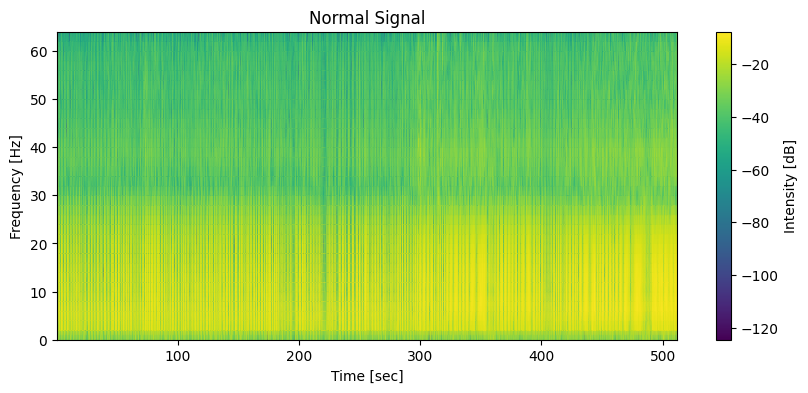

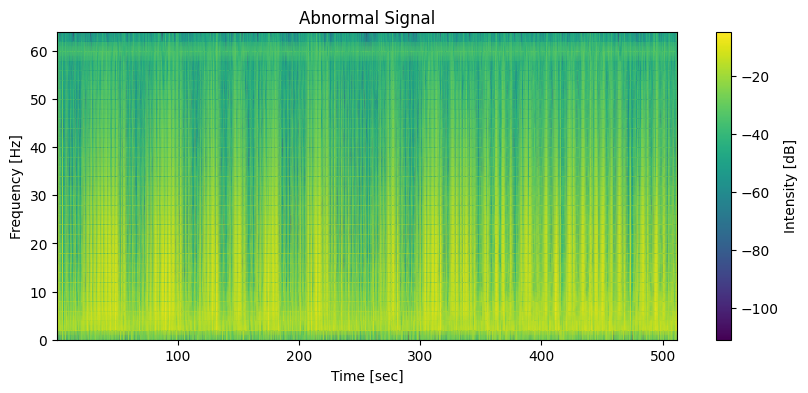

In [39]:
# Computing and Plotting Spectrograms

from scipy.signal import spectrogram

fs = 128  # Sampling frequency (Hz)

# Function to plot spectrogram
def plot_spectrogram(signal_data, fs, title):
    frequencies, times, Sxx = spectrogram(signal_data, fs=fs, nperseg=64, noverlap=32) 
    plt.figure(figsize=(10, 4))
    plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
    plt.title(title)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar(label='Intensity [dB]')
    plt.show()

# Plot spectrograms
plot_spectrogram(normal_signal, fs, 'Normal Signal')
plot_spectrogram(abnormal_signal, fs, 'Abnormal Signal')

# We use scipy.signal.spectrogram to compute the spectrogram.
# nperseg and noverlap are set to get appropriate time and frequency resolutions.


In MATLAB, **instfreq** computes the instantaneous frequency using the spectrogram.

Instantaneous frequency represents the frequency content of a signal as it evolves over time. For some types of signals, like sinusoidal or modulated signals, the instantaneous frequency can give you a very clear time-varying frequency pattern. In real-valued signals like ECG, where the content isn't clearly harmonic or periodic, the instantaneous frequency might not have a straightforward interpretation.

However, in this case, **we compute the instantaneous frequency as the centroid of the Power Spectral Density (PSD) in each time window.**

Here is how the Instantaneous Frequency is computed using the PSD's centroid:
1. Spectrogram Calculation: **signal.spectrogram** is used to compute the spectrogram of the signal, which gives you the power of the signal across different frequencies (f) and times (t).
2. Normalization: The spectrogram matrix **Sxx** is normalized along the frequency axis for each time step, so that the power in each time window sums to 1.
3. Compute Instantaneous Frequency (Centroid): The instantaneous frequency **inst_freq** is computed as the weighted average (centroid) of the frequencies for each time step.

In [40]:
def compute_instantaneous_frequency_spectrogram(signal, fs):
    f, t, Sxx = spectrogram(signal, fs=fs, nperseg=64, noverlap=32)
    Sxx = np.abs(Sxx)
    # Normalize the spectrogram
    Sxx_norm = Sxx / np.sum(Sxx, axis=0, keepdims=True)
    # Compute instantaneous frequency (mean frequency)
    inst_freq = np.sum(f[:, np.newaxis] * Sxx_norm, axis=0)
    return inst_freq, t


In order to capture the complexity of frequency distribution in the signal, we will use the function *compute_spectral_entropy* to calculate Spectral Entropy.

**Spectral entropy** quantifies the irregularity of the frequency content of a signal.

Low spectral entropy: Indicates a more "regular" signal, with power concentrated at specific frequencies.
High spectral entropy: Indicates a more "random" or "complex" signal, with power distributed across a wide range of frequencies.

1. Spectrogram Calculation: The spectrogram is computed the same way as in the instantaneous frequency calculation, giving us the matrix Sxx.
2. Normalization: The power values in Sxx are normalized along the frequency axis for each time step, forming a probability distribution for the power over different frequencies.
3. Compute Spectral Entropy:  H = - ∑ P(m) log2(P(m)), where P is the normalized PSD at each time step.
4. Normalization of Spectral Entropy: The entropy is normalized by dividing by the logarithm of the number of frequency bins. This normalization ensures the spectral entropy is bounded between 0 (highly regular signal) and 1 (highly irregular signal).

In [41]:
def compute_spectral_entropy(signal, fs):
    f, t, Sxx = spectrogram(signal, fs=fs, nperseg=64, noverlap=32)
    Sxx = np.abs(Sxx)
    # Normalize the spectrogram
    psd = Sxx / np.sum(Sxx, axis=0, keepdims=True)
    # Compute spectral entropy
    spectral_entropy = -np.sum(psd * np.log(psd + 1e-12), axis=0)  # Add small value to avoid log(0)
    # Normalize spectral entropy
    spectral_entropy /= np.log(psd.shape[0])  # Divide by log of number of frequency bins
    return spectral_entropy, t



### Visualization of Instantaneous Frequency and Spectral Entropy

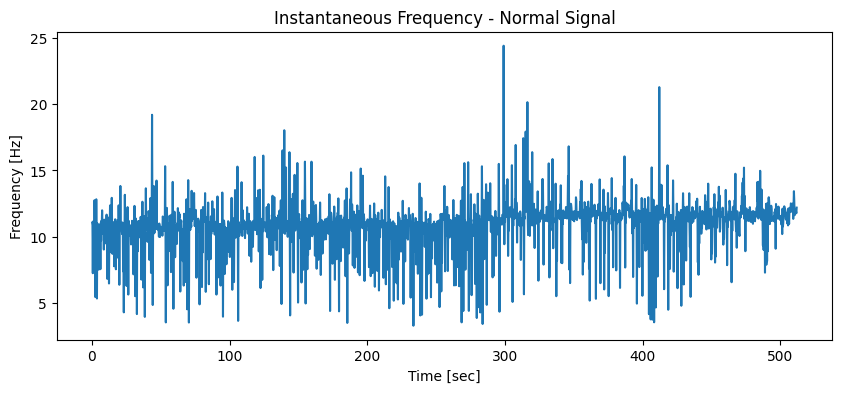

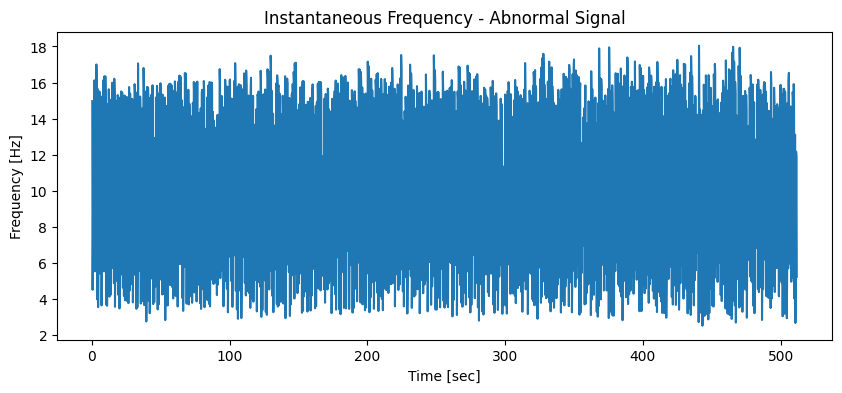

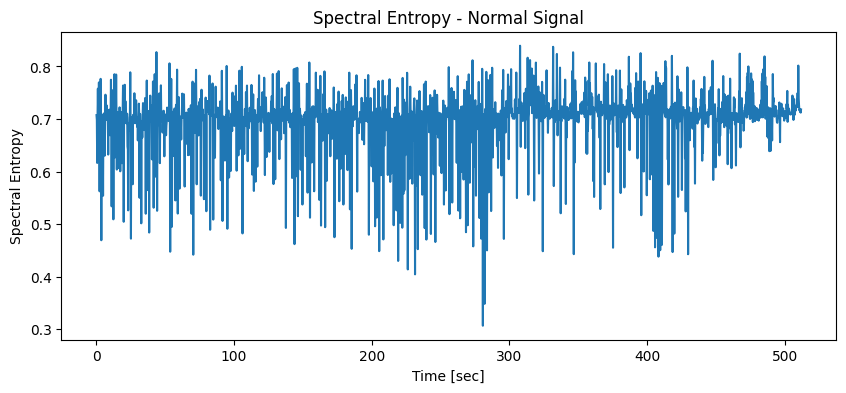

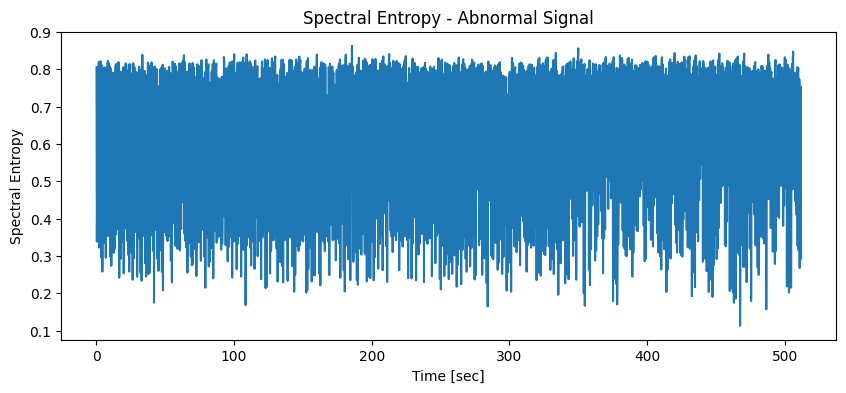

In [42]:
# Compute features for the normal signal
inst_freq_normal, t_inst_freq_normal = compute_instantaneous_frequency_spectrogram(normal_signal, fs)
spectral_entropy_normal, t_entropy_normal = compute_spectral_entropy(normal_signal, fs)

# Compute features for the abnormal signal
inst_freq_abnormal, t_inst_freq_abnormal = compute_instantaneous_frequency_spectrogram(abnormal_signal, fs)
spectral_entropy_abnormal, t_entropy_abnormal = compute_spectral_entropy(abnormal_signal, fs)

# Plot Instantaneous Frequency
plt.figure(figsize=(10, 4))
plt.plot(t_inst_freq_normal, inst_freq_normal)
plt.title('Instantaneous Frequency - Normal Signal')
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(t_inst_freq_abnormal, inst_freq_abnormal)
plt.title('Instantaneous Frequency - Abnormal Signal')
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

# Plot Spectral Entropy
plt.figure(figsize=(10, 4))
plt.plot(t_entropy_normal, spectral_entropy_normal)
plt.title('Spectral Entropy - Normal Signal')
plt.xlabel('Time [sec]')
plt.ylabel('Spectral Entropy')
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(t_entropy_abnormal, spectral_entropy_abnormal)
plt.title('Spectral Entropy - Abnormal Signal')
plt.xlabel('Time [sec]')
plt.ylabel('Spectral Entropy')
plt.show()



### **Aplying Feature Extraction to All Signals**

In this part we'll compute the instantaneous frequency and spectral entropy for each signal in the dataset.

In [43]:
def extract_features(signal, fs):
    inst_freq, _ = compute_instantaneous_frequency_spectrogram(signal, fs)
    spectral_entropy, _ = compute_spectral_entropy(signal, fs)
    # Ensure both features have the same length
    min_length = min(len(inst_freq), len(spectral_entropy))
    inst_freq = inst_freq[:min_length]
    spectral_entropy = spectral_entropy[:min_length]
    # Stack features
    features = np.vstack((inst_freq, spectral_entropy))
    return features



First, we need to split our data into training, validation, and testing sets.

In [44]:
from sklearn.model_selection import train_test_split

# First, split into training and testing
X_temp, X_test, y_temp, y_test = train_test_split(
    segments, segment_labels_encoded, test_size=0.2, random_state=42, stratify=segment_labels_encoded)

# Then, split the temp data into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)  # 0.25 x 0.8 = 0.2 validation set


Now, we can apply the feature extraction.

Note that each features element in the list **X_train_features** is a 2D array with shape (2, N), where N is the number of time points (depends on the length of the signal and spectrogram parameters).

In [45]:
# Sampling frequency
fs = 128

# Function to extract features from all signals in a dataset
def extract_features_dataset(signals, fs):
    features = []
    for signal in signals:
        feat = extract_features(signal, fs)
        features.append(feat)
    return features

# Extract features for each set
X_train_features = extract_features_dataset(X_train, fs)
X_valid_features = extract_features_dataset(X_valid, fs)
X_test_features = extract_features_dataset(X_test, fs)


#### Ensure Consistent Feature Lengths

Due to windowing in the spectrogram, the number of time points may vary slightly. To ensure consistent input sizes for the LSTM, we need to pad or truncate the feature sequences to a fixed length. Thus, we will find the minimum length across all feature sequences.

In [46]:
def get_min_feature_length(feature_sets):
    min_length = min([feat.shape[1] for feat in feature_sets])
    return min_length

min_length_train = get_min_feature_length(X_train_features)
min_length_valid = get_min_feature_length(X_valid_features)
min_length_test = get_min_feature_length(X_test_features)
min_length = min(min_length_train, min_length_valid, min_length_test)
print("Minimum feature length:", min_length)


Minimum feature length: 63


Now, **X_train_padded** will be an array of shape (num_samples, 2, 63)

In [47]:
def pad_or_truncate_features(features, target_length):
    features_padded = []
    for feat in features:
        if feat.shape[1] < target_length:
            pad_width = target_length - feat.shape[1]
            feat_padded = np.pad(feat, ((0, 0), (0, pad_width)), mode='constant')
        else:
            feat_padded = feat[:, :target_length]
        features_padded.append(feat_padded)
    return np.array(features_padded)


# Decide on target length
target_length = min_length  # Or set to a specific value like 64

# Pad or truncate features
X_train_padded = pad_or_truncate_features(X_train_features, target_length)
X_valid_padded = pad_or_truncate_features(X_valid_features, target_length)
X_test_padded = pad_or_truncate_features(X_test_features, target_length)


#### Transpose Feature Arrays for LSTM Input

LSTM layers in Keras expect input in the shape (samples, time_steps, features). Currently, our data is in the shape (samples, 2, target_length), where 2 is the number of features.

Thus, we will transpose the last two dimensions.

In [48]:
# Transpose to (samples, time_steps, features)
X_train_final = np.transpose(X_train_padded, (0, 2, 1))
X_valid_final = np.transpose(X_valid_padded, (0, 2, 1))
X_test_final = np.transpose(X_test_padded, (0, 2, 1))

print("Final training data shape:", X_train_final.shape)


Final training data shape: (3110, 63, 2)


### **Standardizing the Data**

We'll standardize the features using the training set mean and standard deviation.

In [49]:
# Reshape training data to (samples*time_steps, features)
X_train_reshaped = X_train_final.reshape(-1, X_train_final.shape[2])
mean = np.mean(X_train_reshaped, axis=0)
std = np.std(X_train_reshaped, axis=0)

print("Feature means:", mean)
print("Feature stds:", std)


Feature means: [8.71049164 0.55809585]
Feature stds: [4.87662794 0.17324834]


In [50]:
def standardize_data(data, mean, std):
    data_standardized = (data - mean) / std
    return data_standardized

X_train_std = standardize_data(X_train_final, mean, std)
X_valid_std = standardize_data(X_valid_final, mean, std)
X_test_std = standardize_data(X_test_final, mean, std)


### **Modify LSTM Network Architecture**

Since each input now has two features per time step, we'll modify the input shape accordingly:

1. We use a Bidirectional LSTM layer with 50 units, as in the MATLAB code.
2. The input shape is (target_length, 2) since we have two features per time step.
3. return_sequences=False because we only need the output at the last time step.
4. A final Dense layer with sigmoid activation for binary classification.

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional

# LSTM Model with modified input shape
lstm_model = Sequential()
lstm_model.add(Bidirectional(LSTM(50, return_sequences=False), input_shape=(target_length, 2)))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/Users/macbookpro2017/project research/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### **Train the LSTM Network**

Monitoring Training Process:

Epochs set to 150 and Batch Size set to 200.

Early Stopping implemented to prevent overfitting.

In [52]:
# Ensure these values are defined
epochs = 150  # Define the number of epochs
batch_size = 200  # Define the batch size

# Early stopping callback
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the LSTM model with early stopping
history = lstm_model.fit(
    X_train_std, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_valid_std, y_valid),
    callbacks=[early_stopping]
)

Epoch 1/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6314 - loss: 0.6477 - val_accuracy: 0.7464 - val_loss: 0.4878
Epoch 2/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7882 - loss: 0.4354 - val_accuracy: 0.7859 - val_loss: 0.4170
Epoch 3/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8084 - loss: 0.3870 - val_accuracy: 0.7946 - val_loss: 0.4018
Epoch 4/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8296 - loss: 0.3586 - val_accuracy: 0.7994 - val_loss: 0.3902
Epoch 5/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8273 - loss: 0.3718 - val_accuracy: 0.8081 - val_loss: 0.3801
Epoch 6/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8394 - loss: 0.3469 - val_accuracy: 0.8149 - val_loss: 0.3658
Epoch 7/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8403 - loss: 0.3417 - val_accuracy: 0.8149 - val_loss: 0.3598
Epoch 8/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8445 - loss: 0.3420 - val_accuracy: 0.

### **Evaluate and Visualize Model Performance**

**Evaluate on Training Data**

In [53]:
train_loss, train_accuracy = lstm_model.evaluate(X_train_std, y_train)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9373 - loss: 0.1561
Training Accuracy: 93.92%


**Evaluate on Testing Data**

In [54]:
test_loss, test_accuracy = lstm_model.evaluate(X_test_std, y_test)
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9085 - loss: 0.2311
Testing Accuracy: 91.51%


**Plot Confusion Matrix**

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


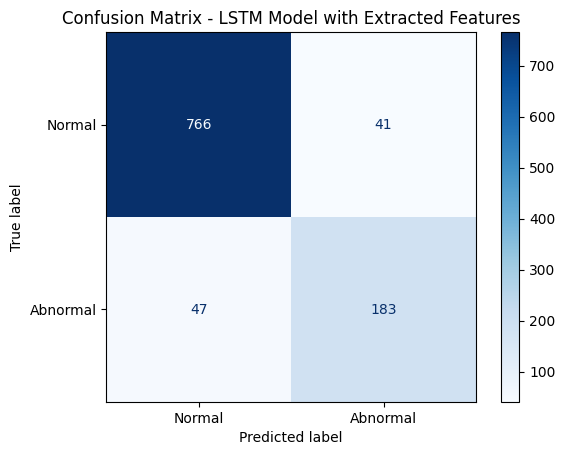

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test data
y_pred_test = lstm_model.predict(X_test_std)
y_pred_test_classes = (y_pred_test > 0.5).astype(int).flatten()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Abnormal'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - LSTM Model with Extracted Features')
plt.show()


In [56]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred_test_classes, target_names=['Normal', 'Abnormal']))
auc = roc_auc_score(y_test, y_pred_test)
print(f"AUC-ROC: {auc:.4f}")


              precision    recall  f1-score   support

      Normal       0.94      0.95      0.95       807
    Abnormal       0.82      0.80      0.81       230

    accuracy                           0.92      1037
   macro avg       0.88      0.87      0.88      1037
weighted avg       0.91      0.92      0.91      1037

AUC-ROC: 0.9633


**Visualize Training History**

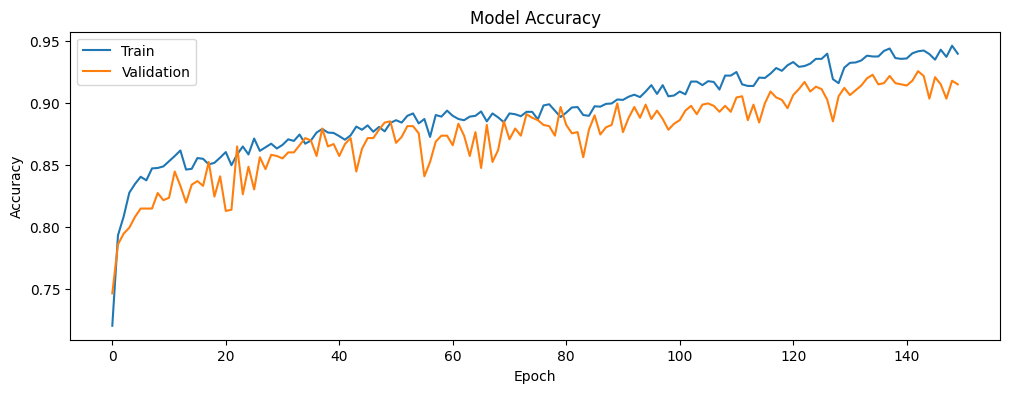

In [57]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


## **Conclusion**

The integration of time-frequency feature extraction significantly improved the performance of the LSTM model in classifying ECG signals. By transforming raw ECG data into informative features like instantaneous frequency and spectral entropy, the model achieved:


**Higher Accuracy:** Improved from ~78% to ~90% after feature extraction.

**Better Generalization:** Early stopping prevented overfitting, and the model performed well on unseen data.

**Effective Classification:** High AUC-ROC score (0.9406) reflects the model's robustness.


#### **Takeaways:**


**Feature Extraction Benefits:** Utilizing domain-specific features can enhance model performance, especially with complex biomedical signals.

**Model Optimization:** Adjusting model architecture and training parameters, along with early stopping, contributes to better results.

**Data Handling:** Proper data segmentation, normalization, and standardization are crucial steps in the preprocessing pipeline.